<a href="https://colab.research.google.com/github/CarolBragaRJ/analisedadospython/blob/master/facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan

In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet
%matplotlib inline 
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r"milk.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [ ]:
df.dtypes

Month                                                       object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75     int64
dtype: object

In [ ]:
df.columns = ["ds","y"]

In [ ]:
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


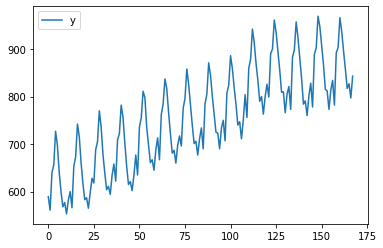

In [ ]:
df.plot()

In [ ]:
df["ds"] = pd.to_datetime(df.ds)

In [ ]:
from fbprophet import Prophet

In [ ]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [ ]:
df.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

In [ ]:
# criando datas futuras para previsões em um dataframe 
future = model.make_future_dataframe(periods=365)

In [ ]:
future.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


In [ ]:
pred = model.predict(future)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.285908,596.296284,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,535.666397,556.574629,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,631.732353,650.366987,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.337047,669.274940,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,712.169590,731.529057,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.028496,803.841310,826.218632,870.605562,879.728423,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,0.0,0.0,0.0,815.347638
529,1976-11-27,875.046715,807.047316,829.950519,870.606377,879.768903,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,0.0,0.0,0.0,818.479106
530,1976-11-28,875.064935,810.482393,833.307982,870.607631,879.808964,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,0.0,0.0,0.0,821.790064
531,1976-11-29,875.083154,814.147088,836.781209,870.614303,879.847924,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,0.0,0.0,0.0,825.219679


In [ ]:
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.789525,576.285908,596.296284
1,1962-02-01,546.067637,535.666397,556.574629
2,1962-03-01,641.570967,631.732353,650.366987
3,1962-04-01,658.623935,648.337047,669.274940
4,1962-05-01,721.619981,712.169590,731.529057


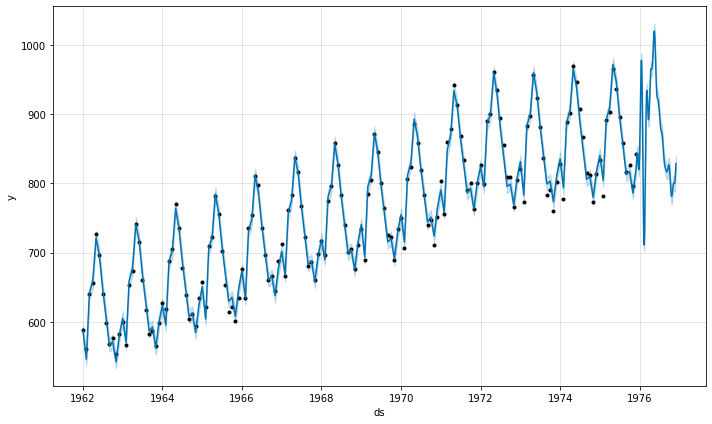

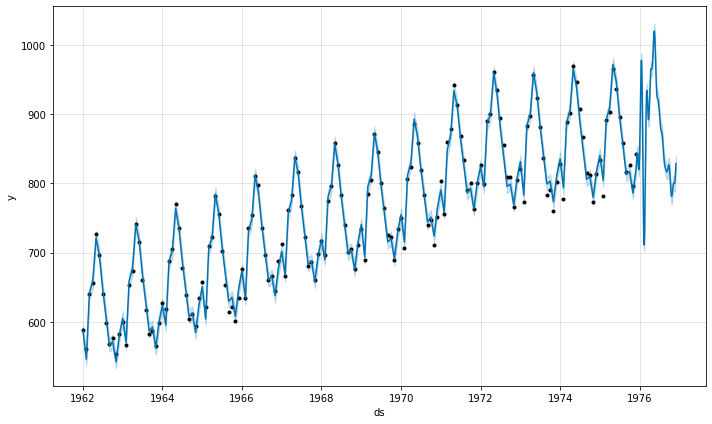

In [ ]:
#forecasting
model.plot(pred)

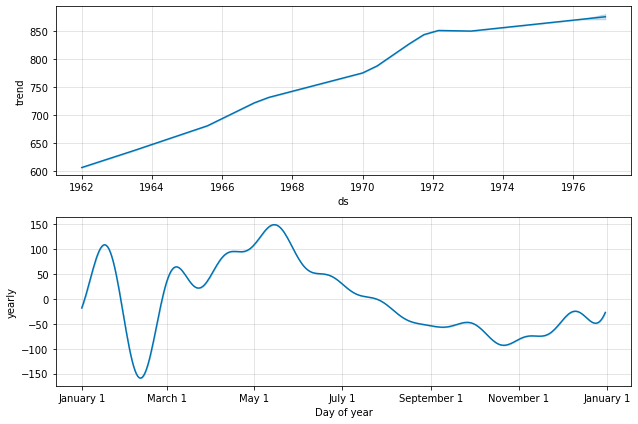

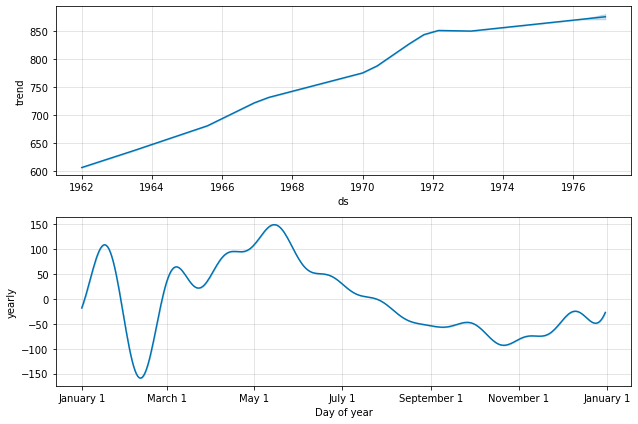

In [ ]:
#visualizacao de cada componente (Trends, Weekly)
model.plot_components(pred)